In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [7]:
test=r'C:\Users\naman\Downloads\Datasets\Datasets\Test'
train=r'C:\Users\naman\Downloads\Datasets\Datasets\Train'

In [39]:
train_img=ImageDataGenerator(rescale=1/255.,rotation_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_img=ImageDataGenerator(rescale=1/255.)
train_g=train_img.flow_from_directory(train,target_size=(254,254),class_mode='categorical',batch_size=32)
test_g=test_img.flow_from_directory(test,target_size=(254,254),class_mode='categorical',batch_size=32)

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [40]:
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input

In [41]:
resnet=ResNet50(input_shape=[254,254]+[3],weights='imagenet',include_top=False)

In [42]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 254, 254, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 260, 260, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 127, 127, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 127, 127, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

conv4_block3_out (Activation)   (None, 16, 16, 1024) 0           conv4_block3_add[0][0]           
__________________________________________________________________________________________________
conv4_block4_1_conv (Conv2D)    (None, 16, 16, 256)  262400      conv4_block3_out[0][0]           
__________________________________________________________________________________________________
conv4_block4_1_bn (BatchNormali (None, 16, 16, 256)  1024        conv4_block4_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block4_1_relu (Activation (None, 16, 16, 256)  0           conv4_block4_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block4_2_conv (Conv2D)    (None, 16, 16, 256)  590080      conv4_block4_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_bloc

In [43]:
resnet.trainable=False

In [44]:
fol=glob(r'C:\Users\naman\Downloads\Datasets\Datasets\Train')
len(fol)

1

In [45]:
model=keras.models.Sequential()
model.add(resnet)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(3,activation="softmax"))

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 8, 8, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 393219    
Total params: 23,980,931
Trainable params: 393,219
Non-trainable params: 23,587,712
_________________________________________________________________


In [47]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [48]:
model_history=model.fit_generator(train_g,steps_per_epoch=len(train_g),validation_data=test_g,epochs=50,validation_steps=len(test_g))

Epoch 1/50
2/2 [==============================] - 72s 42s/step - loss: 5.3975 - accuracy: 0.3542 - val_loss: 25.3028 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 56s 40s/step - loss: 17.3550 - accuracy: 0.3542 - val_loss: 21.1259 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 129s 95s/step - loss: 10.1840 - accuracy: 0.3646 - val_loss: 1.7355 - val_accuracy: 0.5690
Epoch 4/50
2/2 [==============================] - 127s 85s/step - loss: 4.5005 - accuracy: 0.4688 - val_loss: 7.4967 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 109s 73s/step - loss: 8.2253 - accuracy: 0.3542 - val_loss: 4.2663 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 73s 40s/step - loss: 3.6592 - accuracy: 0.5000 - val_loss: 10.6862 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 54s 38s/step - loss: 5.9316 - accuracy: 0.4583 - val_loss: 8.7254 - val_accuracy: 0.2241
Epoch 8/50
2/2 [===

(0.0, 1.0)

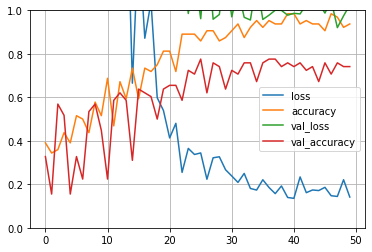

In [49]:
import pandas as pd
pd.DataFrame(model_history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)

In [50]:
model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 2}

In [51]:
model.save('resnet.h5')

In [52]:
pred=model.evaluate(test_g)

2/2 [==============================] - 29s 13s/step - loss: 1.0248 - accuracy: 0.7414


In [55]:
y_pred=np.argmax(pred)
y_pred

0

In [58]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('resnet.h5')

In [73]:
img=image.load_img(r'C:\Users\naman\Downloads\Datasets\Datasets\Test\lamborghini\5.jpg',target_size=(254,254))
x=image.img_to_array(img)
x

array([[[182., 212., 238.],
        [182., 212., 238.],
        [182., 212., 238.],
        ...,
        [191., 207., 230.],
        [191., 207., 230.],
        [190., 206., 229.]],

       [[185., 212., 239.],
        [185., 212., 239.],
        [185., 212., 239.],
        ...,
        [192., 208., 231.],
        [191., 207., 230.],
        [191., 207., 230.]],

       [[185., 212., 239.],
        [185., 212., 239.],
        [185., 212., 239.],
        ...,
        [192., 208., 231.],
        [191., 207., 230.],
        [191., 207., 230.]],

       ...,

       [[145., 137., 135.],
        [142., 134., 132.],
        [142., 134., 132.],
        ...,
        [113., 112., 110.],
        [ 98.,  97.,  95.],
        [118., 117., 115.]],

       [[145., 137., 135.],
        [142., 134., 132.],
        [142., 134., 132.],
        ...,
        [113., 112., 110.],
        [ 98.,  97.,  95.],
        [118., 117., 115.]],

       [[153., 145., 143.],
        [152., 144., 142.],
        [149., 1

In [74]:
x=x/255.
x=np.expand_dims(x,axis=0)
img1=preprocess_input(x)
img1.shape

(1, 254, 254, 3)

In [75]:
model.predict(img1)

array([[3.1032569e-06, 4.2364729e-05, 9.9995458e-01]], dtype=float32)

In [77]:
a=np.argmax(model.predict(img1), axis=1)
a

array([2], dtype=int64)

In [78]:
a==2

array([ True])